<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

**Ход работы:**
1) Подготовка данных.<br> 
2) Исследование баланса классов, обучение модели без учёта дисбаланса.<br> 
3) Улучшение качества модели, учитывая дисбаланс классов. Обучение разных моделей и поиск лучшей.<br>
4) Финальное тестирование модели.

## Подготовка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from io import BytesIO
import requests
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# откроем файл и изучим общую информацию
df = pd.read_csv('/datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
# изучим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Проверим наличие пропусков в даных. 

In [4]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
# рассмотрим количество пропусков в процентном соотношении
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.000000
Balance,0.000000
NumOfProducts,0.000000


Заполнение пропусков случайным значением или медианой может привести к анализу ошибочных данных. Столбец Tenure содержит менее 10% пропусков, это малая часть датафрейма. В данном случае избавиться от пропусков лучше через их удаление.

In [6]:
df.dropna(axis=0)
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
# удалим пропуски 
df = df.dropna(subset=['Tenure'])
#print(df['Tenure'].isna().sum())

Столбец Exited содержит в себе целевой признак. Будем решать задачу бинарной классификации. Запишем признаки в переменную features, а целевой признак в переменную target.

In [8]:
features = df.drop('Exited', axis=1)
target = df['Exited']

Опишем некоторые типы признаков в отдельных списках.

In [9]:
# категориальные признаки
categorical_features = ['Gender', 'Geography']
# неинформативные признаки
not_informative = ['RowNumber','CustomerId','Surname']
# целевой признак
target_name = ['Exited']

Удалим неинформативные признаки.

In [10]:
df = df.drop(columns=not_informative)

Разделим данные на обучающую, валидационную и тестовые выборки.

In [11]:
# разделяем данные на 3 выборки
X = df.drop(columns=target_name)
y=df[target_name]

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state = 12345)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state = 12345)

X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

#print(X_train)

(5454, 10)
(1818, 10)
(1819, 10)


Преобразуем категориальные признаки в численные методом OHE

In [12]:
# используем технику one hot encoding
ohe = OneHotEncoder(sparse = False)
X_train_ohe=ohe.fit_transform(X_train[categorical_features])
X_valid_ohe = ohe.transform(X_valid[categorical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])
# преобразуем array в dataframe
X_train_ohe=pd.DataFrame(X_train_ohe, columns = [
    'Gender_Female','Gender_Male','Geography_France','Geography_Germany','Geography_Spain'])
X_valid_ohe=pd.DataFrame(X_valid_ohe, columns = [
    'Gender_Female','Gender_Male','Geography_France','Geography_Germany','Geography_Spain'])
X_test_ohe=pd.DataFrame(X_test_ohe, columns = [
    'Gender_Female','Gender_Male','Geography_France','Geography_Germany','Geography_Spain'])
# удалим столбцы, подлежащие восстановлению
X_train_ohe=X_train_ohe.drop(['Gender_Female', 'Geography_France'],axis=1)
X_valid_ohe=X_valid_ohe.drop(['Gender_Female', 'Geography_France'],axis=1)
X_test_ohe=X_test_ohe.drop(['Gender_Female', 'Geography_France'],axis=1)

#print(X_train_ohe)

In [13]:
# для названий столбцов
print(X_train['Gender'].unique())
print(X_train['Geography'].unique())

['Female' 'Male']
['Spain' 'France' 'Germany']


In [14]:
#X_train[categorical_features].tail(),X_train_ohe.tail()

Соединим датафреймы преобразованных категориальных признаков с числовыми. 

In [15]:
X_train_transformed = pd.concat([X_train,X_train_ohe],axis=1)
X_valid_transformed = pd.concat([X_valid,X_valid_ohe],axis=1)
X_test_transformed = pd.concat([X_test,X_test_ohe],axis=1)
#print(X_train_transformed.isna().sum())
#print(X_train_transformed)

Удалим столбец с категориальными признаками.

In [16]:
X_train_transformed = X_train_transformed.drop(categorical_features, axis = 1)
X_valid_transformed = X_valid_transformed.drop(categorical_features, axis = 1)
X_test_transformed = X_test_transformed.drop(categorical_features, axis = 1)
#print(X_train_transformed)

Масштабируем признаки. 

In [17]:
# масштабируем числовые признаки с помощью standard scaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train_transformed)
X_valid_transformed = scaler.transform(X_valid_transformed)
X_test_transformed = scaler.transform(X_test_transformed)

# всплывает предупреждение A value is trying to be set on a copy of a slice from a DataFrame, отключаю 
warnings.filterwarnings('ignore') 

X_train_transformed = pd.DataFrame(X_train_transformed, columns = [
    'CreditScore','Age','Tenure','Balance','NumOfProduct','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male',
    'Geography_Germany','Geography_Spain'])
#print(X_train_transformed)
                                                

**Итоги подготовки данных:**<br>
Данные были разделены на 3 выборки.<br> 
Категориальные признаки были преобразованы методом OHE.<br>
Признаки были масштабированы с помощью StandardScaler.<br> 
Пропуски в данных отсутствуют.<br> 
Целевой признак: Exited.<br>

## Исследование задачи

Исследуем баланс классов. 

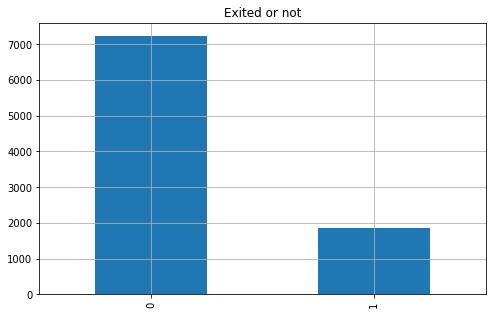

In [18]:
# построим гистограмму значений столбца exited
df['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(8,5),title='Exited or not');

Классы несбалансированны. Соотношение классов 1 и 0: 1 к 4.

Исследуем значимость признаков.

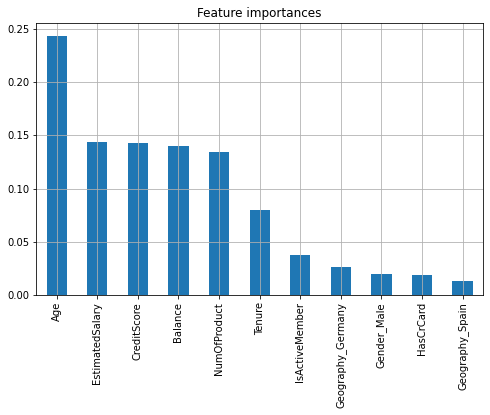

In [19]:
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

fe = classifier.feature_importances_

importance = pd.Series(fe, index = X_train_transformed.columns).sort_values(ascending = False)
importance.plot(kind='bar',grid=True, figsize=(8,5), title='Feature importances');

Наиболее значимым признаком может являться возраст.

Рассмотрим различные модели без учета дисбаланса.

1) Дерево решений.

In [20]:
# напишем цикл с перебором глубины дерева для поиска лучшей модели
decision_tree_best_model = None
decision_tree_best_result = 0
for depth in range(1, 6):
    decision_tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # задаем глубину дерева
    decision_tree_model.fit(X_train_transformed,y_train) # обучаем модель
    decision_tree_predictions = decision_tree_model.predict(X_valid_transformed) # получим предсказания модели
    decision_tree_result = f1_score(y_valid, decision_tree_predictions) # посчитаем качество модели
    if decision_tree_result > decision_tree_best_result:
        decision_tree_best_model = decision_tree_model
        decision_tree_best_result = decision_tree_result
        max_depth = depth
        probabilities_valid_tree = decision_tree_best_model.predict_proba(X_valid_transformed)
        probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
        auc_roc_tree = roc_auc_score(y_valid, probabilities_one_valid_tree)
print("max_depth =", max_depth)
print("F1 лучшей модели дерева решений:", decision_tree_best_result)
print('AUC-ROC:', auc_roc_tree)

max_depth = 5
F1 лучшей модели дерева решений: 0.5571658615136877
AUC-ROC: 0.8036164551626549


2) Случайный лес.

In [21]:
# напишем цикл с перебором количества деревьев для поиска лучшей модели
random_forest_best_model = None
random_forest_best_result = 0
for est in range(1, 101):
    # задаем количество деревьев
    random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    # обучаем модель на тренировочной выборке
    random_forest_model.fit(X_train_transformed,y_train)
    # получим предсказание модели
    random_forest_predictions = random_forest_model.predict(X_valid_transformed)
    # считаем качество модели на валидационной выборке
    random_forest_result = f1_score(y_valid, random_forest_predictions)
    if random_forest_result > random_forest_best_result:
        random_forest_best_model = random_forest_model # сохраним наилучшую модель
        #  сохраним наилучшее значение метрики accuracy на валидационных данных
        random_forest_best_result = random_forest_result 
        estimators = est
        probabilities_valid_forest = random_forest_best_model.predict_proba(X_valid_transformed)
        probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
        auc_roc_forest = roc_auc_score(y_valid, probabilities_one_valid_forest)
print("estimators =", estimators)
print("F1 наилучшей модели случайного леса на валидационной выборке:", random_forest_best_result)
print("AUC-ROC:", auc_roc_forest)

estimators = 79
F1 наилучшей модели случайного леса на валидационной выборке: 0.5709342560553633
AUC-ROC: 0.8348424633819567


3) Логистическая регрессия.

In [22]:
# задаем random_state, solver (алгоритм) и max_iter (максимальное количество итераций)
logistic_regression_model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
# обучаем модель на тренировочной выборке
logistic_regression_model.fit(X_train_transformed, y_train)
# получим предсказание модели
logistic_regression_predictions = logistic_regression_model.predict(X_valid_transformed)
# рассчитываем F1
logistic_regression_result = f1_score(y_valid, logistic_regression_predictions)
# рассчитываем AUC-ROC
probabilities_valid_regression = logistic_regression_model.predict_proba(X_valid_transformed)
probabilities_one_valid_regression = probabilities_valid_regression[:, 1]
auc_roc_regression = roc_auc_score(y_valid,probabilities_one_valid_regression)
print("F1 модели логистической регрессии на валидационной выборке:", logistic_regression_result)
print("AUC-ROC:", auc_roc_regression)

F1 модели логистической регрессии на валидационной выборке: 0.3004115226337448
AUC-ROC: 0.7724525433169247


Запишем полученные результаты в виде таблицы. 

In [23]:
all_results = [
    {'decision_tree_F1': decision_tree_best_result, 'random_forest_F1': random_forest_best_result,
    'logistic_regression_F1':logistic_regression_result, 'decision_tree_AUC-ROC': auc_roc_tree, 'random_forest_AUC-ROC':
    auc_roc_forest, 'logistic_regression_AUC-ROC': auc_roc_regression}]
all_results_df = pd.DataFrame(all_results, index=['unbalanced'])
all_results_df

,decision_tree_F1,random_forest_F1,logistic_regression_F1,decision_tree_AUC-ROC,random_forest_AUC-ROC,logistic_regression_AUC-ROC
unbalanced,0.557166,0.570934,0.300412,0.803616,0.834842,0.772453


**Итоги исследования задачи:**<br>
Исходные данные не сбалансированы. Лучший результат F1 показывает модель случайного леса.	

## Борьба с дисбалансом

Для борьбы с дисбалансом временно добавим в выборку X_train_transformed данные по целевому признаку из столбца exited. 

In [24]:
X_train_with_target = X_train_transformed.join(y_train.reset_index(drop=True))

In [25]:
features_zeros = X_train_with_target.loc[X_train_with_target['Exited'] == 0].drop(['Exited'], axis=1)
features_ones = X_train_with_target.loc[X_train_with_target['Exited'] == 1].drop(['Exited'], axis=1)
target_zeros = y_train.loc[y_train['Exited'] == 0]
target_ones = y_train.loc[y_train['Exited'] == 1]

**1. Провизведем увеличение выборки.**

In [26]:
# функция для увеличения выборки
def upsample(X_train_transformed, y_train, repeat):


    X_train_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    y_train_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    X_train_upsampled, y_train_upsampled = shuffle(
        X_train_upsampled, y_train_upsampled, random_state=12345)
    
    return X_train_upsampled, y_train_upsampled

X_train_upsampled, y_train_upsampled = upsample(X_train_transformed, y_train, 4)

Проверим, как изменятся показатели F1 и AUC-ROC при увеличенной выборке на разных моделях.

1) Дерево решений.

In [27]:
# напишем цикл с перебором глубины дерева для поиска лучшей модели
dt_upsampled_best_model = None
dt_upsampled_best_result = 0
for depth in range(1, 6):
    dt_upsampled = DecisionTreeClassifier(random_state=12345, max_depth=depth) # задаем глубину дерева
    dt_upsampled.fit(X_train_upsampled,y_train_upsampled) # обучаем модель
    dt_upsampled_predictions = dt_upsampled.predict(X_valid_transformed) # получим предсказания модели
    dt_upsampled_result = f1_score(y_valid, dt_upsampled_predictions) # посчитаем качество модели
    if dt_upsampled_result > dt_upsampled_best_result:
        dt_upsampled_best_model = dt_upsampled
        dt_upsampled_best_result = dt_upsampled_result
        max_depth = depth
        probabilities_valid_tree = dt_upsampled_best_model.predict_proba(X_valid_transformed)
        probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
        auc_roc_upsampled_tree = roc_auc_score(y_valid, probabilities_one_valid_tree)
print("max_depth =", max_depth)
print("F1 лучшей модели дерева решений (выборка увеличена):", dt_upsampled_best_result)
print('AUC-ROC:', auc_roc_upsampled_tree)

max_depth = 5
F1 лучшей модели дерева решений (выборка увеличена): 0.535675082327113
AUC-ROC: 0.8082012374113715


2) Случайный лес.

In [28]:
# напишем цикл с перебором количества деревьев для поиска лучшей модели
rf_upsampled_best_model = None
rf_upsampled_best_result = 0
for est in range(1, 101):
    # задаем количество деревьев
    rf_upsampled_model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    # обучаем модель на тренировочной выборке
    rf_upsampled_model.fit(X_train_upsampled,y_train_upsampled)
    # получим предсказание модели
    rf_upsampled_predictions = rf_upsampled_model.predict(X_valid_transformed)
    # считаем качество модели на валидационной выборке
    rf_upsampled_result = f1_score(y_valid, rf_upsampled_predictions)
    if rf_upsampled_result > rf_upsampled_best_result:
        rf_upsampled_best_model = rf_upsampled_model # сохраним наилучшую модель
        #  сохраним наилучшее значение метрики accuracy на валидационных данных
        rf_upsampled_best_result = rf_upsampled_result 
        estimators = est
        probabilities_valid_forest = rf_upsampled_best_model.predict_proba(X_valid_transformed)
        probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
        auc_roc_rf_upsampled = roc_auc_score(y_valid, probabilities_one_valid_forest)
print("estimators =", estimators)
print("F1 наилучшей модели случайного леса  (выборка увеличена):", rf_upsampled_best_result)
print("AUC-ROC:", auc_roc_rf_upsampled)

estimators = 41
F1 наилучшей модели случайного леса  (выборка увеличена): 0.6116941529235382
AUC-ROC: 0.8295435728371645


3) Логистическая регрессия.

In [29]:
logistic_regression_upsampled_model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
logistic_regression_upsampled_model.fit(X_train_upsampled,y_train_upsampled)
logistic_regression_upsampled_predictions = logistic_regression_upsampled_model.predict(X_valid_transformed)

logistic_regression_upsampled_result = f1_score(y_valid, logistic_regression_upsampled_predictions)

probabilities_valid_upsampled_logistic_regression = logistic_regression_upsampled_model.predict_proba(X_valid_transformed)
probabilities_one_valid_upsampled_logistic_regression = probabilities_valid_upsampled_logistic_regression[:, 1]
auc_roc_upsampled_logistic_regression = roc_auc_score(y_valid, probabilities_one_valid_upsampled_logistic_regression)

print("F1 логистической регрессии (выборка увеличена):", logistic_regression_upsampled_result)
print('AUC-ROC:', auc_roc_upsampled_logistic_regression)

F1 логистической регрессии (выборка увеличена): 0.4951830443159922
AUC-ROC: 0.7748027969712024


Добавим полученные метрики в таблицу результатов.

In [30]:
all_results = [
    {'decision_tree_F1': decision_tree_best_result, 'random_forest_F1': random_forest_best_result,
    'logistic_regression_F1':logistic_regression_result, 'decision_tree_AUC-ROC': auc_roc_tree, 'random_forest_AUC-ROC':
    auc_roc_forest, 'logistic_regression_AUC-ROC': auc_roc_regression}, {'decision_tree_F1': dt_upsampled_best_result,
    'random_forest_F1': rf_upsampled_best_result, 'logistic_regression_F1': logistic_regression_upsampled_result, 
    'decision_tree_AUC-ROC': auc_roc_upsampled_tree, 'random_forest_AUC-ROC': auc_roc_rf_upsampled,
    'logistic_regression_AUC-ROC': auc_roc_upsampled_logistic_regression}]
all_results_df = pd.DataFrame(all_results, index=['unbalanced','upsampled'])
all_results_df

,decision_tree_F1,random_forest_F1,logistic_regression_F1,decision_tree_AUC-ROC,random_forest_AUC-ROC,logistic_regression_AUC-ROC
unbalanced,0.557166,0.570934,0.300412,0.803616,0.834842,0.772453
upsampled,0.535675,0.611694,0.495183,0.808201,0.829544,0.774803


Лучший показатель F1 у модели случайного леса. AUC-ROC увеличился, но незначительно. 

**2. Произведем уменьшение выборки.**

In [31]:
# функция для уменьшения выборки
def downsample(X_train_transformed, y_train, fraction):
    
    X_train_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    y_train_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    X_train_downsampled, y_train_downsampled = shuffle(
        X_train_downsampled, y_train_downsampled, random_state=12345)
    
    return X_train_downsampled, y_train_downsampled

X_train_downsampled, y_train_downsampled = downsample(X_train_transformed, y_train, 0.25)

Проверим, как изменятся показатели F1 и AUC-ROC при уменьшенной выборке на разных моделях.

1) Дерево решений.

In [32]:
# напишем цикл с перебором глубины дерева для поиска лучшей модели
dt_downsampled_best_model = None
dt_downsampled_best_result = 0
for depth in range(1, 101):
    dt_downsampled = DecisionTreeClassifier(random_state=12345, max_depth=depth) # задаем глубину дерева
    dt_downsampled.fit(X_train_downsampled,y_train_downsampled) # обучаем модель
    dt_downsampled_predictions = dt_downsampled.predict(X_valid_transformed) # получим предсказания модели
    dt_downsampled_result = f1_score(y_valid, dt_downsampled_predictions) # посчитаем качество модели
    if dt_downsampled_result > dt_downsampled_best_result:
        dt_downsampled_best_model = dt_downsampled
        dt_downsampled_best_result = dt_downsampled_result
        max_depth = depth
        probabilities_valid_tree = dt_downsampled_best_model.predict_proba(X_valid_transformed)
        probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
        auc_roc_downsampled_tree = roc_auc_score(y_valid, probabilities_one_valid_tree)
print("max_depth =", max_depth)
print("F1 лучшей модели дерева решений (выборка уменьшена):", dt_downsampled_best_result)
print('AUC-ROC:', auc_roc_downsampled_tree)

max_depth = 5
F1 лучшей модели дерева решений (выборка уменьшена): 0.553191489361702
AUC-ROC: 0.8094826807568983


2) Случайный лес. 

In [33]:
# напишем цикл с перебором количества деревьев для поиска лучшей модели
rf_downsampled_best_model = None
rf_downsampled_best_result = 0
for est in range(1, 101):
    # задаем количество деревьев
    rf_downsampled_model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    # обучаем модель на тренировочной выборке
    rf_downsampled_model.fit(X_train_downsampled,y_train_downsampled)
    # получим предсказание модели
    rf_downsampled_predictions = rf_downsampled_model.predict(X_valid_transformed)
    # считаем качество модели на валидационной выборке
    rf_downsampled_result = f1_score(y_valid, rf_downsampled_predictions)
    if rf_downsampled_result > rf_downsampled_best_result:
        rf_downsampled_best_model = rf_downsampled_model # сохраним наилучшую модель
        #  сохраним наилучшее значение метрики accuracy на валидационных данных
        rf_downsampled_best_result = rf_downsampled_result 
        estimators = est
        probabilities_valid_forest = rf_downsampled_best_model.predict_proba(X_valid_transformed)
        probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
        auc_roc_rf_downsampled = roc_auc_score(y_valid, probabilities_one_valid_forest)
print("estimators =", estimators)
print("F1 наилучшей модели случайного леса  (выборка уменьшена):", rf_downsampled_best_result)
print("AUC-ROC:", auc_roc_rf_downsampled)

estimators = 47
F1 наилучшей модели случайного леса  (выборка уменьшена): 0.5837837837837838
AUC-ROC: 0.8343710954552981


3) Логистическая регрессия. 

In [34]:
logistic_regression_downsampled_model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
logistic_regression_downsampled_model.fit(X_train_downsampled,y_train_downsampled)
logistic_regression_downsampled_predictions = logistic_regression_downsampled_model.predict(X_valid_transformed)

logistic_regression_downsampled_result = f1_score(y_valid, logistic_regression_downsampled_predictions)

probabilities_valid_downsampled_logistic_regression = logistic_regression_downsampled_model.predict_proba(X_valid_transformed)
probabilities_one_valid_downsampled_logistic_regression = probabilities_valid_downsampled_logistic_regression[:, 1]
auc_roc_downsampled_logistic_regression = roc_auc_score(y_valid, probabilities_one_valid_downsampled_logistic_regression)

print("F1 логистической регрессии (выборка уменьшена):", logistic_regression_downsampled_result)
print('AUC-ROC:', auc_roc_downsampled_logistic_regression)



F1 логистической регрессии (выборка уменьшена): 0.5
AUC-ROC: 0.7754896204970722


Добавим полученные метрики в таблицу результатов.

In [35]:
all_results = [
    {'decision_tree_F1': decision_tree_best_result, 'random_forest_F1': random_forest_best_result,
    'logistic_regression_F1':logistic_regression_result, 'decision_tree_AUC-ROC': auc_roc_tree, 'random_forest_AUC-ROC':
    auc_roc_forest, 'logistic_regression_AUC-ROC': auc_roc_regression}, {'decision_tree_F1': dt_upsampled_best_result,
    'random_forest_F1': rf_upsampled_best_result, 'logistic_regression_F1': logistic_regression_upsampled_result, 
    'decision_tree_AUC-ROC': auc_roc_upsampled_tree, 'random_forest_AUC-ROC': auc_roc_rf_upsampled,
    'logistic_regression_AUC-ROC': auc_roc_upsampled_logistic_regression}, {'decision_tree_F1': dt_downsampled_best_result, 
    'random_forest_F1' : rf_downsampled_best_result, 'logistic_regression_F1': logistic_regression_downsampled_result,
     'decision_tree_AUC-ROC': auc_roc_downsampled_tree, 'random_forest_AUC-ROC': auc_roc_rf_downsampled, 
    'logistic_regression_AUC-ROC':auc_roc_downsampled_logistic_regression}]
all_results_df = pd.DataFrame(all_results, index=['unbalanced','upsampled', 'downsampled'])
all_results_df

,decision_tree_F1,random_forest_F1,logistic_regression_F1,decision_tree_AUC-ROC,random_forest_AUC-ROC,logistic_regression_AUC-ROC
unbalanced,0.557166,0.570934,0.300412,0.803616,0.834842,0.772453
upsampled,0.535675,0.611694,0.495183,0.808201,0.829544,0.774803
downsampled,0.553191,0.583784,0.500000,0.809483,0.834371,0.775490


Улучшились показатели F1 случайного леса и логистической регрессии.

**3. Сбалансируем веса признаков.**

1) Дерево решений.

In [36]:
# лучший результат на дереве решений был при глубине 5, используем это значение, задаем веса классов
decision_tree_weight_model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
decision_tree_weight_model.fit(X_train_transformed,y_train)
decision_tree_weight_predictions = decision_tree_weight_model.predict(X_valid_transformed)


decision_tree_weight_result = f1_score(y_valid, decision_tree_weight_predictions)

probabilities_valid_weight_tree = decision_tree_weight_model.predict_proba(X_valid_transformed)
probabilities_one_valid_weight_tree = probabilities_valid_weight_tree[:, 1]
auc_roc_weight_tree = roc_auc_score(y_valid, probabilities_one_valid_weight_tree)

print("F1 дерева решений (веса сбалансированы):", decision_tree_weight_result)
print('AUC-ROC:', auc_roc_weight_tree)

F1 дерева решений (веса сбалансированы): 0.535675082327113
AUC-ROC: 0.8081560764124103


2) Случайный лес.

In [37]:
# лучший результат на случайном лесе был при estimators = 9, используем это значение, задаем веса классов
random_forest_weight_model = RandomForestClassifier(random_state=12345, n_estimators=9, class_weight='balanced') 
random_forest_weight_model.fit(X_train_transformed,y_train)
random_forest_weight_predictions = random_forest_weight_model.predict(X_valid_transformed)

random_forest_weight_result = f1_score(y_valid, random_forest_weight_predictions)

probabilities_valid_weight_random_forest = random_forest_weight_model.predict_proba(X_valid_transformed)
probabilities_one_valid_weight_random_forest = probabilities_valid_weight_random_forest[:, 1]
auc_roc_weight_random_forest = roc_auc_score(y_valid, probabilities_one_valid_weight_random_forest)

print("F1 случайного леса (веса сбалансированы):", random_forest_weight_result)
print('AUC-ROC:', auc_roc_weight_random_forest)

F1 случайного леса (веса сбалансированы): 0.5153583617747441
AUC-ROC: 0.7908490644146382


3) Логистическая регрессия.

In [38]:
# используем те же гиперпараметры, но добавляем class_weight
logistic_regression_weight_model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
# обучаем модель на тренировочной выборке
logistic_regression_weight_model.fit(X_train_transformed, y_train)
# получим предсказание модели
logistic_regression_weight_predictions = logistic_regression_weight_model.predict(X_valid_transformed) 
# рассчитываем F1
logistic_regression_weight_result = f1_score(y_valid, logistic_regression_weight_predictions)
probabilities_valid_weight_regression = logistic_regression_weight_model.predict_proba(X_valid_transformed)
probabilities_one_valid_weight_regression = probabilities_valid_weight_regression[:, 1]
auc_roc_weight_regression = roc_auc_score(y_valid,probabilities_one_valid_weight_regression)
print("F1 модели логистической регрессии на валидационной выборке (веса сбалансированны):", logistic_regression_weight_result)
print("AUC-ROC:", auc_roc_regression)

F1 модели логистической регрессии на валидационной выборке (веса сбалансированны): 0.49506903353057197
AUC-ROC: 0.7724525433169247


Добавим полученные метрики в таблицу результатов.

In [39]:
all_results = [
    {'decision_tree_F1': decision_tree_best_result, 'random_forest_F1': random_forest_best_result,
    'logistic_regression_F1':logistic_regression_result, 'decision_tree_AUC-ROC': auc_roc_tree, 'random_forest_AUC-ROC':
    auc_roc_forest, 'logistic_regression_AUC-ROC': auc_roc_regression}, {'decision_tree_F1': dt_upsampled_best_result,
    'random_forest_F1': rf_upsampled_best_result, 'logistic_regression_F1': logistic_regression_upsampled_result, 
    'decision_tree_AUC-ROC': auc_roc_upsampled_tree, 'random_forest_AUC-ROC': auc_roc_rf_upsampled,
    'logistic_regression_AUC-ROC': auc_roc_upsampled_logistic_regression}, {'decision_tree_F1': dt_downsampled_best_result, 
    'random_forest_F1' : rf_downsampled_best_result, 'logistic_regression_F1': logistic_regression_downsampled_result,
     'decision_tree_AUC-ROC': auc_roc_downsampled_tree, 'random_forest_AUC-ROC': auc_roc_rf_downsampled, 
    'logistic_regression_AUC-ROC':auc_roc_downsampled_logistic_regression}, {'decision_tree_F1': decision_tree_weight_result,
     'random_forest_F1': random_forest_weight_result, 'logistic_regression_F1': logistic_regression_weight_result, 
    'decision_tree_AUC-ROC': auc_roc_weight_tree, 'random_forest_AUC-ROC': auc_roc_weight_random_forest,
    'logistic_regression_AUC-ROC': auc_roc_weight_regression} ]
all_results_df = pd.DataFrame(all_results, index=['unbalanced','upsampled','downsampled','weight_balanced'])
all_results_df

,decision_tree_F1,random_forest_F1,logistic_regression_F1,decision_tree_AUC-ROC,random_forest_AUC-ROC,logistic_regression_AUC-ROC
unbalanced,0.557166,0.570934,0.300412,0.803616,0.834842,0.772453
upsampled,0.535675,0.611694,0.495183,0.808201,0.829544,0.774803
downsampled,0.553191,0.583784,0.500000,0.809483,0.834371,0.775490
weight_balanced,0.535675,0.515358,0.495069,0.808156,0.790849,0.774750


Согласно условиям исследования, лучшую модель выбираем по метрике F1.

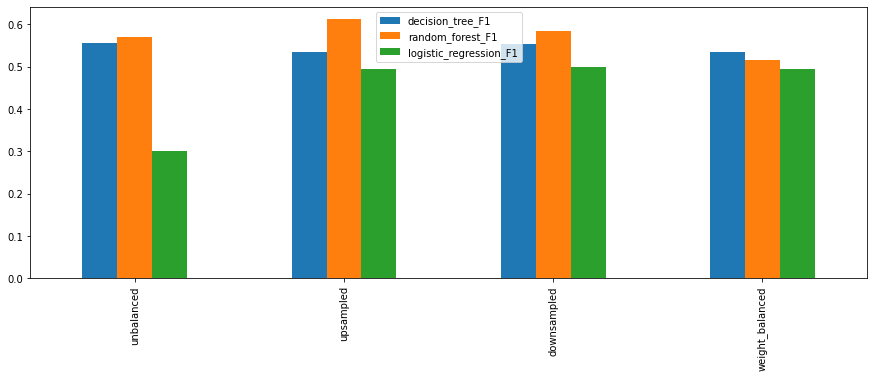

In [40]:
# построим график
all_results_df.drop(['decision_tree_AUC-ROC','random_forest_AUC-ROC','logistic_regression_AUC-ROC'],axis=1).plot(
    kind='bar', figsize=(15,5));

**Вывод по разделу "Борьба с дисбалансом:"**<br>
Лучшая модель - случайный лес с увеличенной выборкой, c количеством деревьев n_estimators = 41. 

## Тестирование модели

Проведем тестирование лучшей модели. 

In [41]:
random_forest_upsampled_model = RandomForestClassifier(random_state=12345, n_estimators=41) 
random_forest_upsampled_model.fit(X_train_upsampled,y_train_upsampled)
random_forest_upsampled_predictions = random_forest_upsampled_model.predict(X_test_transformed)

random_forest_upsampled_result = f1_score(y_test, random_forest_upsampled_predictions)

probabilities_valid_upsampled_random_forest = random_forest_upsampled_model.predict_proba(X_test_transformed)
probabilities_one_valid_upsampled_random_forest = probabilities_valid_upsampled_random_forest[:, 1]
auc_roc_upsampled_random_forest = roc_auc_score(y_test, probabilities_one_valid_upsampled_random_forest)

print("F1 случайного леса (тест):", random_forest_upsampled_result)
print('AUC-ROC:', auc_roc_upsampled_random_forest)

F1 случайного леса (тест): 0.5930232558139534
AUC-ROC: 0.8414606111578358


In [42]:
X_test_transformed

array([[ 0.77981638,  0.18587171,  0.69748023, ...,  0.91757577,
        -0.57974973, -0.56704592],
       [-1.21819398,  0.56640637, -1.37350635, ..., -1.08982826,
        -0.57974973, -0.56704592],
       [ 0.59538466, -0.38493027, -0.68317749, ..., -1.08982826,
        -0.57974973,  1.76352562],
       ...,
       [ 1.64049777, -0.28979661,  1.38780909, ...,  0.91757577,
        -0.57974973, -0.56704592],
       [ 0.02159707, -0.48006394,  1.38780909, ..., -1.08982826,
        -0.57974973, -0.56704592],
       [-1.16696294,  0.47127271, -1.02834192, ..., -1.08982826,
        -0.57974973, -0.56704592]])

Целевой показатель F1 достигнут. 

**Вывод**<br>

В ходе исследования данные были подготовлены для обучения. Выполнена предобработка данных - устранены пропуски в столбце Tenure.<br>
Исследован баланс классов. Исходные данные были несбалансированны.<br>
Было обучено 3 модели без учета дисбаланса. На валидационной выборке лучший показатель F1 и AUC-ROC был у модели случайного леса с гиперпараметром n_estimators = 79.<br>
Были произведены попытки улучшения качества моделей, учитывая дисбаланс классов: увеличение выборки, уменьшение выборки, балансирование весов признаков. Лучшие результаты были получены для модели случайного леса, обученной на увеличенной выборке с гиперпараметром n_estimators = 41. <br>
По финальному тестированию лучшая модель достигла порогового значения метрики F1 - 0.59.